# **Face and Eye Detection with Haar Cascade Classifiers**

#### **In this lesson we'll learn:**
1. To use a Haarcascade Classifer to detect faces
2. To use a Haarcascade Classifer to detect eyes
3. To use a Haarcascade Classifer to detect faces and eyes from your webcam in Colab

In [1]:
import cv2
import numpy
import matplotlib.pyplot as plt

In [9]:
def cv_imshow(image = None, title="Image", size=5):
    w, h = image.shape[:2]
    aspect_ratio = (w/h)
    plt.figure(figsize=(size*aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

## **Simple Face Detection using Haarcascade Classifiers**

### **Firstly, What is Object Detection?**

![](https://miro.medium.com/max/739/1*zlWrCk1hBBFRXa5t84lmHQ.jpeg)

**Object Detection** is the ability to detect and classify individual objects in an image and draw a bounding box over the object's area. 

## **HAAR Cascade Classifiers**

Developed by Viola and Jones in 2001.

An object detection method that uses a series of classifiers (cascade) to identify objects in an image. They are trained to identify one type of object, however, we can use several of them in parallel e.g. detecting eyes and faces together. HAAR Classifiers are trained using lots of positive images (i.e. images with the object present) and negative images (i.e. images without the object present).
![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/haar.png)


In [10]:
# We point OpenCV's CascadeClassifier function to where our 
# classifier (XML file format) is stored

face_classifier = cv2.CascadeClassifier("../data/Haarcascades/haarcascade_frontalface_default.xml")
face_classifier

< cv2.CascadeClassifier 0x13886cb90>

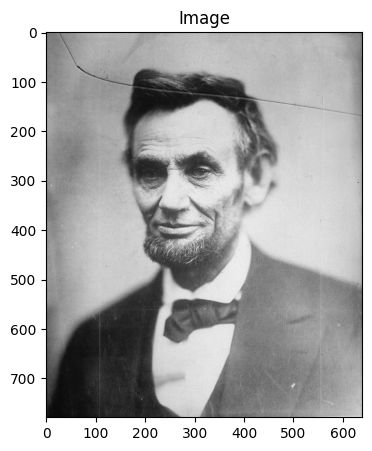

In [18]:
# Load our image then convert it to grayscale

img = cv2.imread("../data/images/abraham.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv_imshow(gray)

In [26]:
# Our classifier returns the ROI of the detected face as a tuple
# It stores the top left coordinate and the bottom right coordiantes

faces = face_classifier.detectMultiScale(img, scaleFactor=1.5, minNeighbors=6)
faces

array([[123, 171, 273, 273]], dtype=int32)

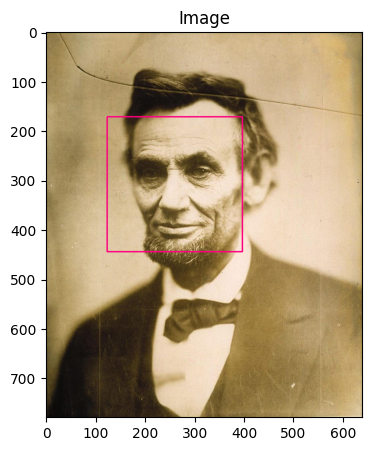

In [31]:
# When no faces detected, face_classifier returns and empty tuple
# if faces is ():
if faces.size == 0:
    print("No faces found")

# We iterate through our faces array and draw a rectangle
# over each face in faces
img_cpy = img.copy()
for (x,y,w,h) in faces:
    cv2.rectangle(img_cpy, (x,y), (x+w,y+h), (127, 0, 255), 2)


cv_imshow(img_cpy)

## **Simple Eye & Face Detection using Haarcascade Classifiers**

In [55]:
face_classifier = cv2.CascadeClassifier('../data/Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('../data/Haarcascades/haarcascade_eye.xml')

In [56]:
img = cv2.imread("../data/images/abraham.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [57]:
faces = face_classifier.detectMultiScale(gray, 1.3, 5)
faces

array([[108, 158, 314, 314]], dtype=int32)

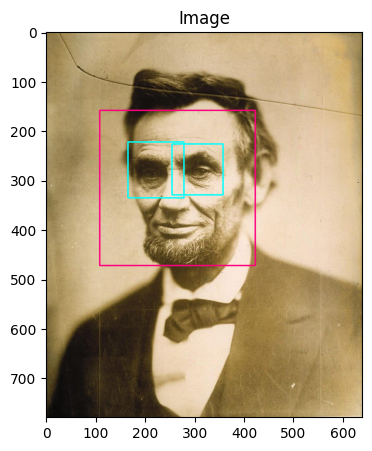

In [58]:

if faces.size == 0:
    print("No faces found")

img_cpy = img.copy()
for (x,y,w,h) in faces:
    cv2.rectangle(img_cpy, (x,y), (x+w,y+h), (127, 0, 255), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img_cpy[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray, 1.01, 3)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)

cv_imshow(img_cpy)